In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [3]:
data_baseline = xr.open_dataset('/Volumes/UnionSine/data_transfer/ssp126/DIC_baseline_ensemble1_ssp126_1m.nc', decode_times=True).sel(deptht=slice(0, 8))

In [4]:
data_oae = xr.open_dataset('/Volumes/UnionSine/data_transfer/ssp126/DIC_CDR_EU_coast_ssp126_1m.nc', decode_times=True).sel(deptht=slice(0, 8))

In [5]:
sliced_data_baseline = data_baseline.where((-25 < data_baseline.nav_lon) & (data_baseline.nav_lon < 10) & (35 < data_baseline.nav_lat) & (data_baseline.nav_lat < 70), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [6]:
sliced_data_oae = data_oae.where((-25 < data_oae.nav_lon) & (data_oae.nav_lon < 10) & (35 < data_oae.nav_lat) & (data_oae.nav_lat < 70), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

In [7]:
sliced_data_baseline_plot = sliced_data_baseline.DIC.mean(dim=('y', 'x'))
sliced_data_oae_plot = sliced_data_oae.DIC.mean(dim=('y', 'x'))

In [8]:
sliced_data_baseline_plot = sliced_data_baseline_plot.to_dataset()
sliced_data_oae_plot = sliced_data_oae_plot.to_dataset()

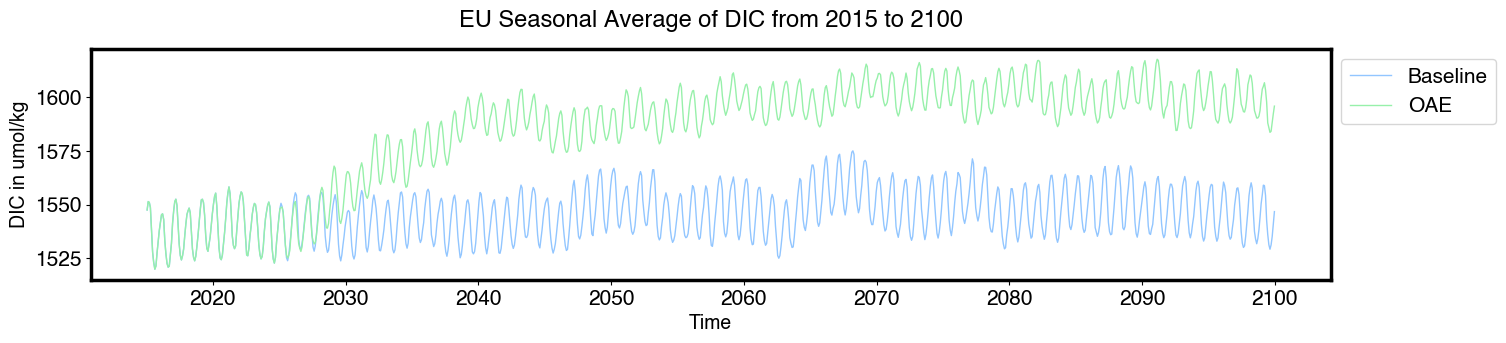

In [9]:
plt.figure(figsize=(16, 3))
plt.plot(sliced_data_baseline_plot.time_counter, sliced_data_baseline_plot.DIC, linewidth=1, label = 'Baseline')
plt.plot(sliced_data_oae_plot.time_counter, sliced_data_oae_plot.DIC, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('EU Seasonal Average of DIC from 2015 to 2100', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [10]:
sliced_frame_baseline_plot = sliced_frame_baseline.DIC.mean(dim=('y', 'x'))
sliced_frame_oae_plot = sliced_frame_oae.DIC.mean(dim=('y', 'x'))

In [11]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

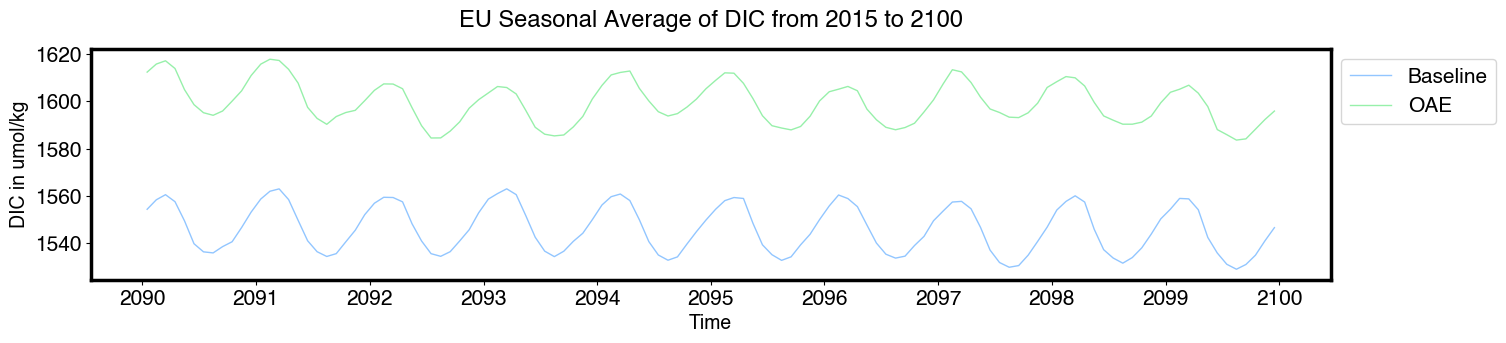

In [12]:
plt.figure(figsize=(16, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.DIC, linewidth=1, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.DIC, linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('EU Seasonal Average of DIC from 2015 to 2100', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

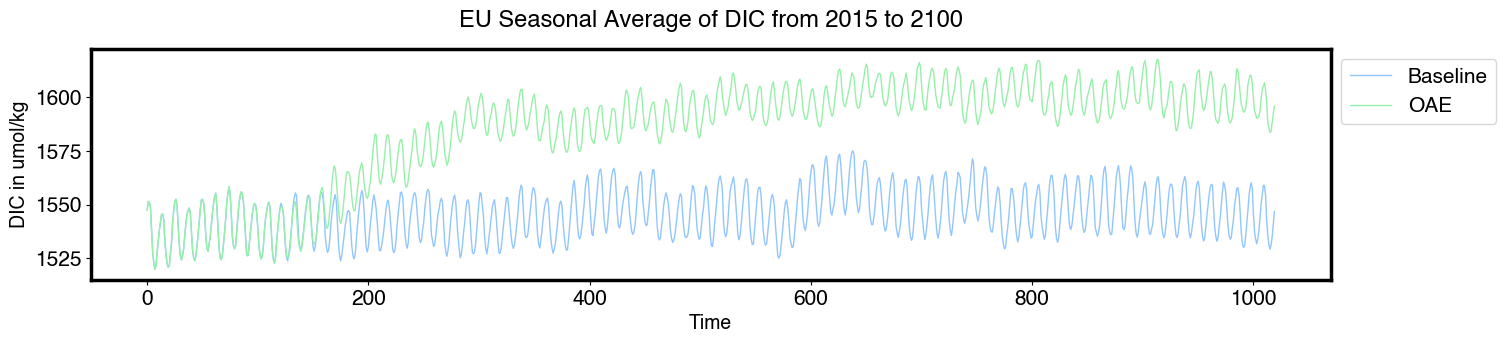

In [13]:
plt.figure(figsize=(16, 3))
plt.plot(sliced_data_baseline.DIC.mean(dim=('y', 'x')), linewidth=1, label = 'Baseline')
plt.plot(sliced_data_oae.DIC.mean(dim=('y', 'x')), linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('EU Seasonal Average of DIC from 2015 to 2100', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

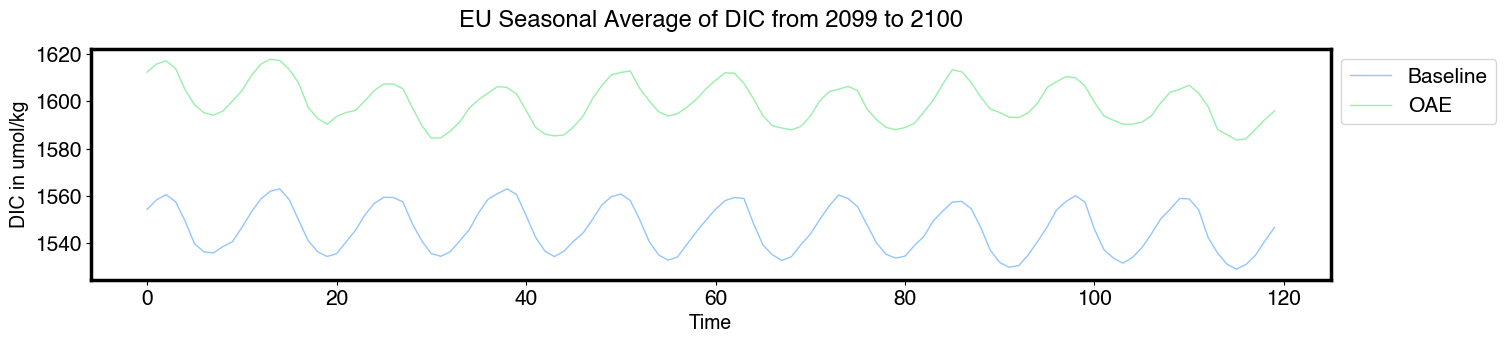

In [14]:
plt.figure(figsize=(16, 3))
plt.plot(sliced_frame_baseline.DIC.mean(dim=('y', 'x')), linewidth=1, label = 'Baseline')
plt.plot(sliced_frame_oae.DIC.mean(dim=('y', 'x')), linewidth=1, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC in umol/kg", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('EU Seasonal Average of DIC from 2099 to 2100', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [15]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_baseline = sliced_data_baseline["DIC"].sel(time_counter=slice(start_date, end_date))

In [16]:
dic_season_summary_baseline = dic_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
dic_season_mean_all_years_baseline = dic_baseline.resample(time_counter='QS-DEC', keep_attrs=True).mean()
dic_seasonal_mean_baseline = dic_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [17]:
start_date = "2090-01-01"
end_date = "2100-01-01"

dic_oae = sliced_data_oae["DIC"].sel(time_counter=slice(start_date, end_date))

In [18]:
dic_season_summary_oae = dic_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
dic_season_mean_all_years_oae = dic_oae.resample(time_counter='QS-DEC', keep_attrs=True).mean()
dic_seasonal_mean_oae = dic_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


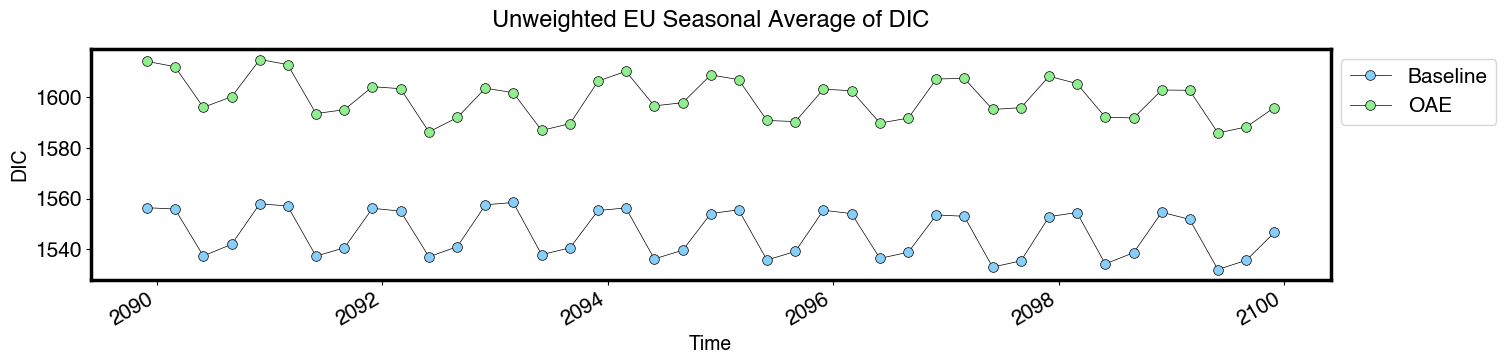

In [19]:
f, ax = plt.subplots(figsize=(16, 3))

dic_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

dic_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of DIC", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [20]:
month_length_baseline = dic_baseline.time_counter.dt.days_in_month
dic_weighted_mean_baseline = ((dic_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
dic_weighted_mean_baseline = dic_weighted_mean_baseline.where(dic_weighted_mean_baseline)
dic_weighted_season_baseline = dic_weighted_mean_baseline.groupby('time_counter').mean(["y", "x"])

In [21]:
month_length_oae = dic_oae.time_counter.dt.days_in_month
dic_weighted_mean_oae = ((dic_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
dic_weighted_mean_oae = dic_weighted_mean_oae.where(dic_weighted_mean_oae)
dic_weighted_season_oae = dic_weighted_mean_oae.groupby('time_counter').mean(["y", "x"])

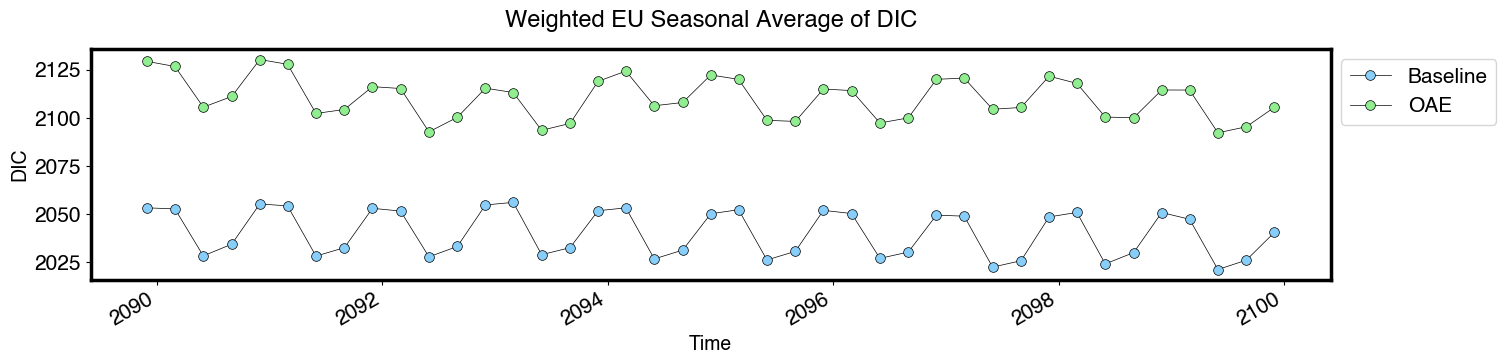

In [22]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(16, 3))
dic_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

dic_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of DIC", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show() 

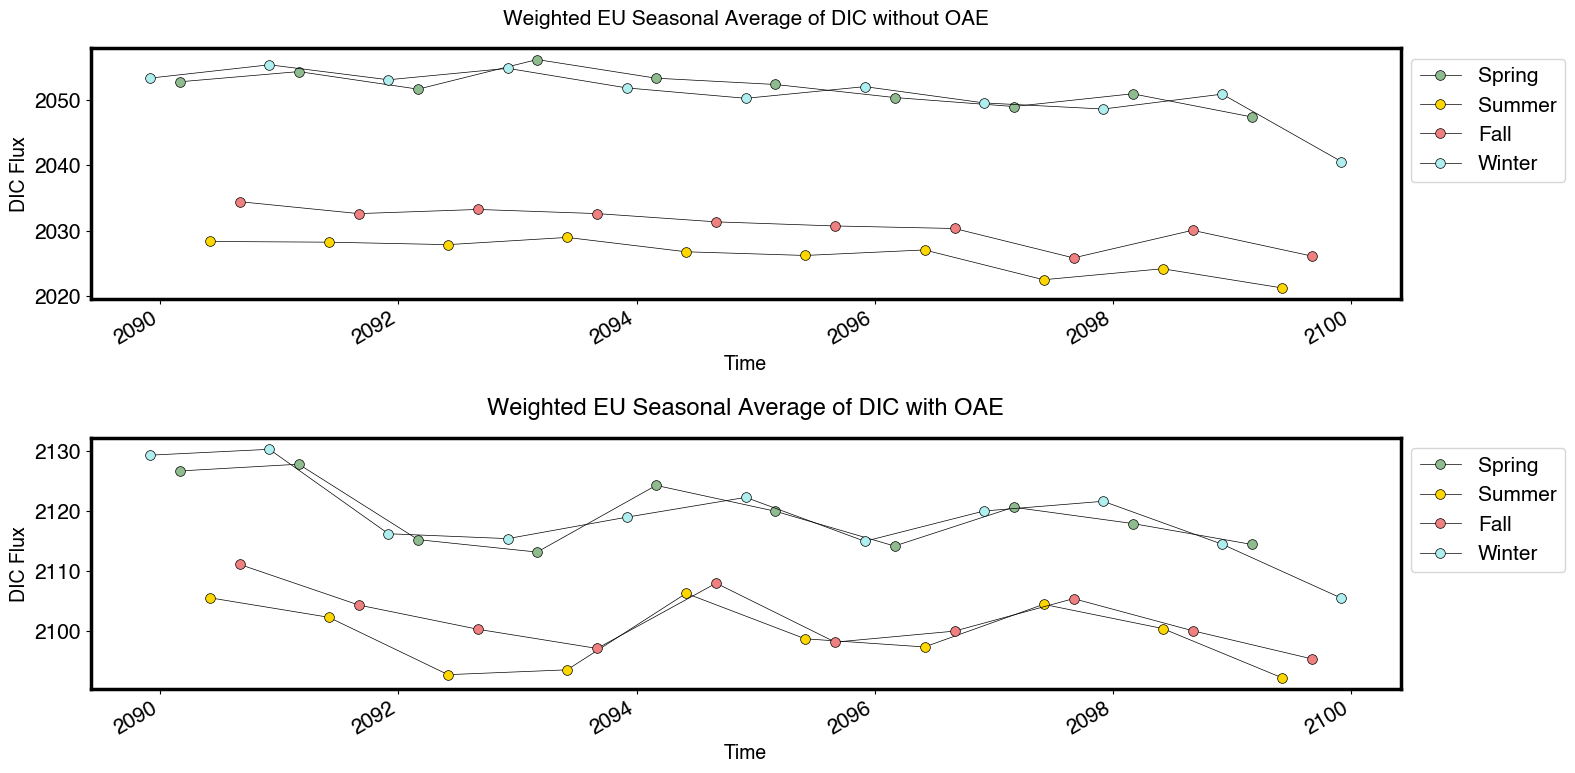

In [23]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharey=False)
for month, arr in dic_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5,
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.set_title("Weighted EU Seasonal Average of DIC without OAE", fontsize=15, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('DIC Flux', fontsize=14)

for month, arr in dic_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5, 
             marker="o", markersize=7, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax2.set_title("Weighted EU Seasonal Average of DIC with OAE", fontname="Helvetica", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('DIC Flux', fontsize=14)
f.tight_layout()
plt.show()

In [24]:
dic_weighted_baseline = dic_weighted_season_baseline.to_dataframe('DIC_Flux')
dic_weighted_baseline = dic_weighted_baseline.droplevel(1, axis=0)
dic_weighted_baseline['Month'] = pd.DatetimeIndex(dic_weighted_baseline.index).month

In [25]:
conditions = [
    (dic_weighted_baseline['Month'] == 3),
    (dic_weighted_baseline['Month'] == 6),
    (dic_weighted_baseline['Month'] == 9),
    (dic_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

dic_weighted_baseline['Month'] = np.select(conditions, values)

In [26]:
colors = dict(zip(dic_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

Text(0.5, 1.06, 'Weighted EU Seasonal Average of DIC without OAE')

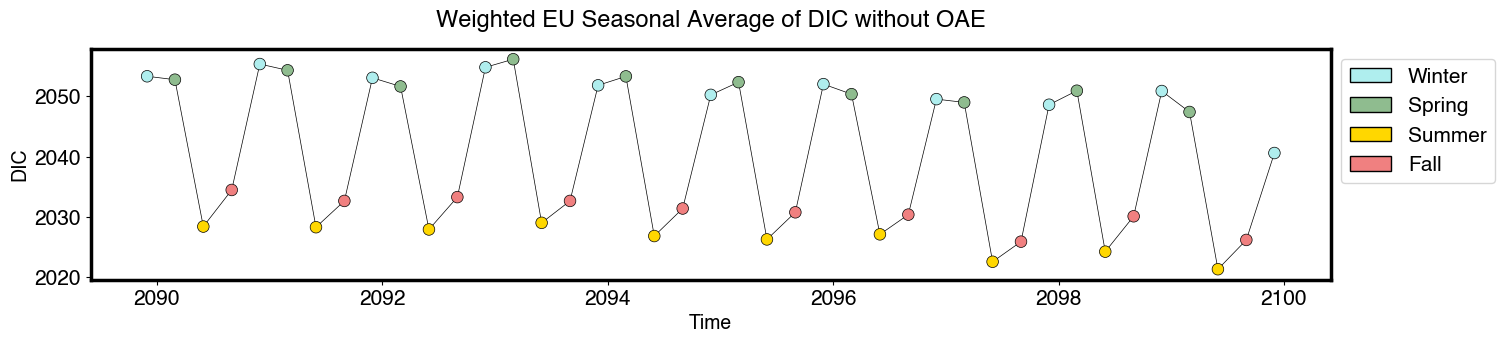

In [27]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot_date(dic_weighted_baseline.index, dic_weighted_baseline.DIC_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_weighted_baseline.index, dic_weighted_baseline.DIC_Flux, color=dic_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC without OAE", fontname="Helvetica", fontsize=17, y=1.06)

In [28]:
dic_weighted_oae = dic_weighted_season_oae.to_dataframe('DIC_Flux')
dic_weighted_oae = dic_weighted_oae.droplevel(1, axis=0)
dic_weighted_oae['Month'] = pd.DatetimeIndex(dic_weighted_oae.index).month

In [29]:
conditions = [
    (dic_weighted_oae['Month'] == 3),
    (dic_weighted_oae['Month'] == 6),
    (dic_weighted_oae['Month'] == 9),
    (dic_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

dic_weighted_oae['Month'] = np.select(conditions, values)

In [30]:
colors = dict(zip(dic_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

Text(0.5, 1.06, 'Weighted EU Seasonal Average of DIC with OAE')

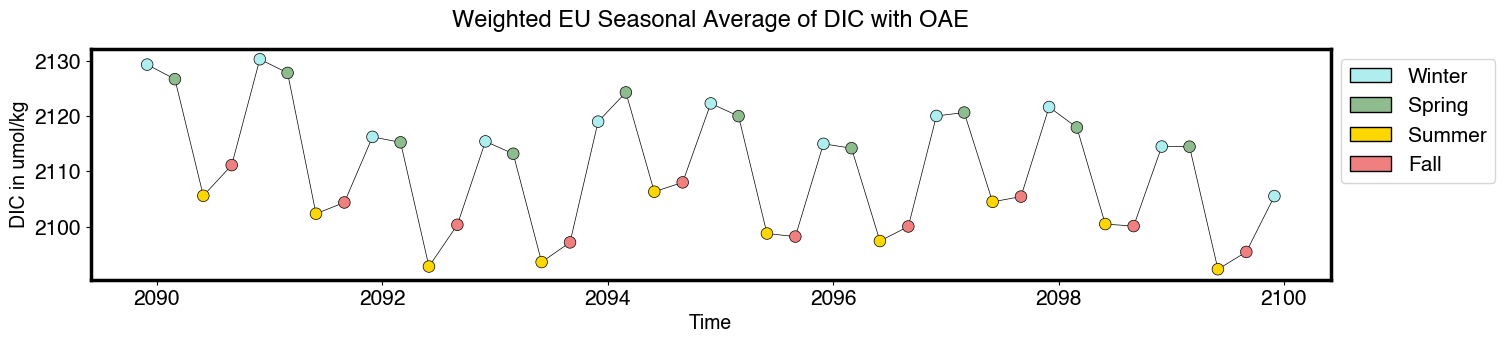

In [31]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot_date(dic_weighted_oae.index, dic_weighted_oae.DIC_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_weighted_oae.index, dic_weighted_oae.DIC_Flux, color=dic_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC in umol/kg', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC with OAE", fontname="Helvetica", fontsize=17, y=1.06)

Text(0.5, 1.06, 'Weighted EU Seasonal Average of DIC')

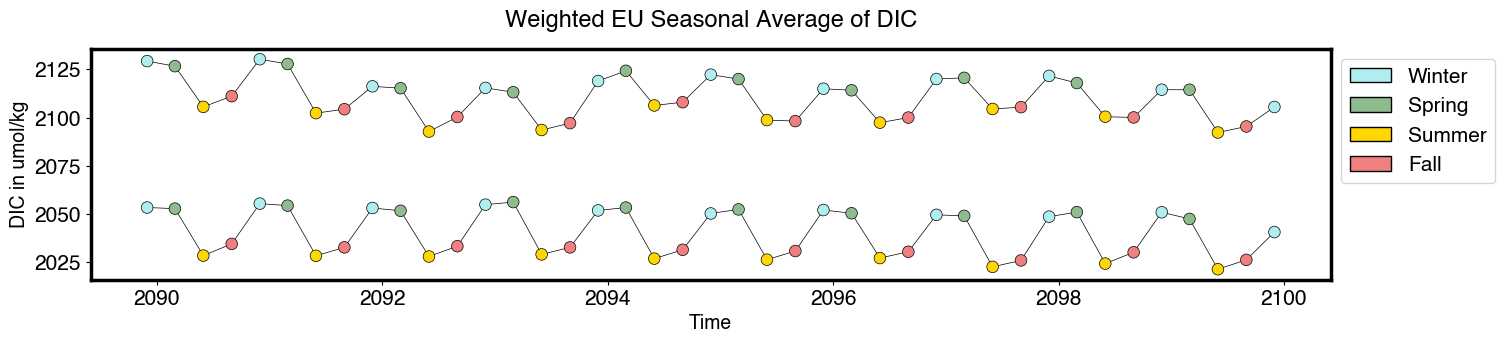

In [32]:
colors = dict(zip(dic_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(16, 3))

ax.plot_date(dic_weighted_baseline.index, dic_weighted_baseline.DIC_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_weighted_baseline.index, dic_weighted_baseline.DIC_Flux, color=dic_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black',  linewidth=0.5, s=70)

ax.plot_date(dic_weighted_oae.index, dic_weighted_oae.DIC_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_weighted_oae.index, dic_weighted_oae.DIC_Flux, color=dic_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black',  linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC in umol/kg', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC", fontname="Helvetica", fontsize=17, y=1.06)

In [33]:
mean_baseline = (sliced_frame_baseline.DIC.mean(dim=('y', 'x'))).to_dataframe()
mean_baseline = mean_baseline.droplevel(1, axis=0)
mean_baseline = mean_baseline.groupby(mean_baseline.index.month).DIC.mean()
mean_baseline = mean_baseline.reset_index()
mean_baseline['time_counter']= mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_baseline = mean_baseline.set_index('time_counter')

In [34]:
mean_oae = (sliced_frame_oae.DIC.mean(dim=('y', 'x'))).to_dataframe()
mean_oae = mean_oae.droplevel(1, axis=0)
mean_oae = mean_oae.groupby(mean_oae.index.month).DIC.mean()
mean_oae = mean_oae.reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_oae = mean_oae.set_index('time_counter')

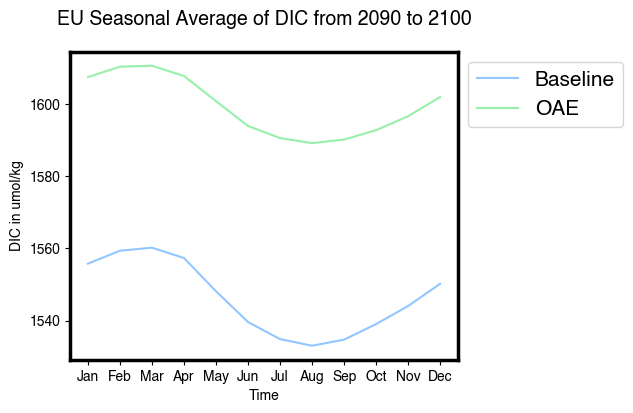

In [35]:
plt.figure(figsize=(5,4))
plt.plot(mean_baseline.DIC, label='Baseline')
plt.plot(mean_oae.DIC, label='OAE')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel("Time", fontsize=10)
plt.ylabel("DIC in umol/kg", fontsize=10)
plt.xticks(fontsize=10, fontname="Helvetica")
plt.yticks(fontsize=10, fontname="Helvetica")
plt.title('EU Seasonal Average of DIC from 2090 to 2100',fontname="Helvetica", fontsize=14, y=1.06)
plt.show()

In [36]:
sliced_frame_baseline = sliced_frame_baseline.DIC.mean(dim=('deptht'))

In [37]:
month_length = sliced_frame_baseline.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_baseline = (sliced_frame_baseline * weights).groupby("time_counter.season").sum(dim="time_counter")

In [38]:
ds_unweighted_baseline = sliced_frame_baseline.groupby("time_counter.season").mean("time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

In [39]:
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='DIC')
ds_unweighted_baseline = ds_unweighted_baseline.to_dataset(name='DIC')
ds_diff_baseline = ds_diff_baseline.to_dataset(name='DIC')

Text(0.5, 1.03, 'EU Seasonal Average of DIC in umol/kg from 2090 to 2100 without OAE')

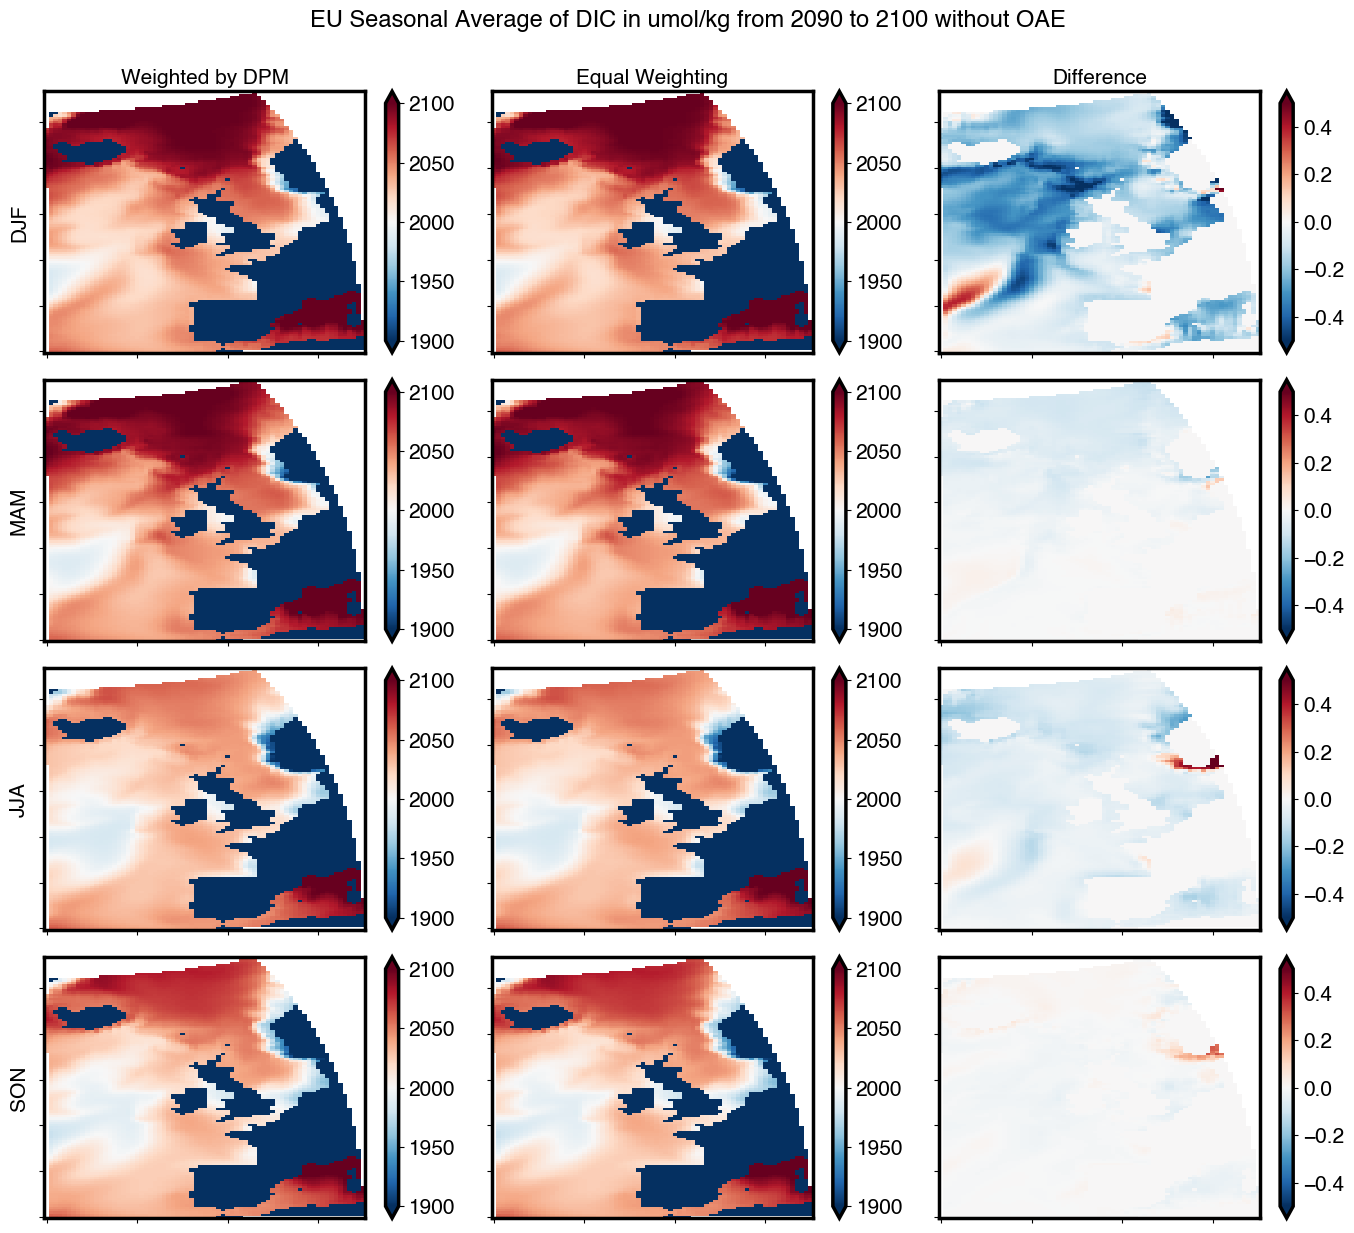

In [40]:
notnull = pd.notnull(ds_unweighted_baseline["DIC"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["DIC"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=1900,
        vmax=2100,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["DIC"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=1900,
        vmax=2100,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["DIC"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")
    axes[i, 0].yaxis.label.set_size(15)
    axes[i, 1].yaxis.label.set_size(15)
    axes[i, 2].yaxis.label.set_size(15)

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of DIC in umol/kg from 2090 to 2100 without OAE", fontsize=17, y=1.03)

In [41]:
sliced_frame_oae = sliced_frame_oae.DIC.mean(dim=('deptht'))

In [42]:
month_length = sliced_frame_oae.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_oae = (sliced_frame_oae * weights).groupby("time_counter.season").sum(dim="time_counter")

In [43]:
ds_unweighted_oae = sliced_frame_oae.groupby("time_counter.season").mean("time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

In [44]:
ds_weighted_oae = ds_weighted_oae.to_dataset(name='DIC')
ds_unweighted_oae = ds_unweighted_oae.to_dataset(name='DIC')
ds_diff_oae = ds_diff_oae.to_dataset(name='DIC')

Text(0.5, 1.03, 'EU Seasonal Average of DIC in umol/kg from 2090 to 2100 with OAE')

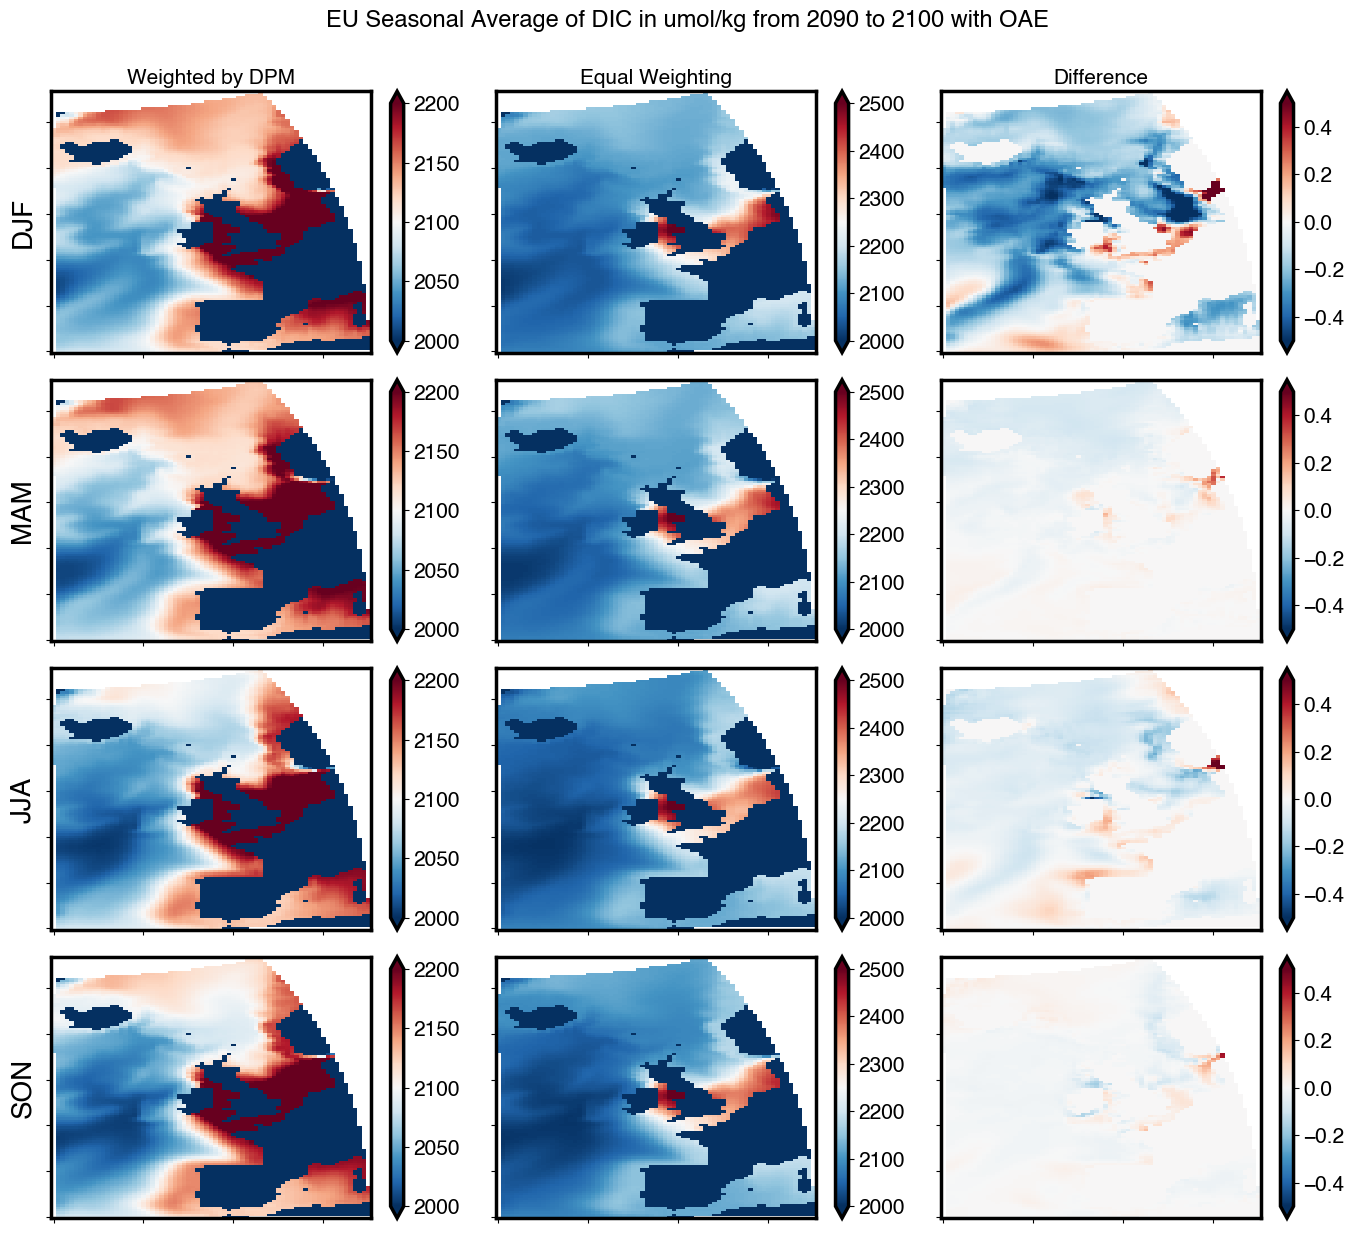

In [47]:
notnull = pd.notnull(ds_unweighted_oae["DIC"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["DIC"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=2000,
        vmax=2200,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["DIC"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=2000,
        vmax=2500,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["DIC"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of DIC in umol/kg from 2090 to 2100 with OAE", fontsize=17, y=1.03)

In [46]:
dic_weighted_baseline

,DIC_Flux,Month
time_counter,,
2089-12-01,2053.341471,Winter
2090-03-01,2052.774000,Spring
2090-06-01,2028.394730,Summer
2090-09-01,2034.468266,Fall
2090-12-01,2055.371177,Winter
2091-03-01,2054.332275,Spring
2091-06-01,2028.286056,Summer
2091-09-01,2032.647758,Fall
2091-12-01,2053.084625,Winter


In [47]:
dic_weighted_oae

,DIC_Flux,Month
time_counter,,
2089-12-01,2129.356396,Winter
2090-03-01,2126.723064,Spring
2090-06-01,2105.593444,Summer
2090-09-01,2111.150756,Fall
2090-12-01,2130.332423,Winter
2091-03-01,2127.848633,Spring
2091-06-01,2102.344208,Summer
2091-09-01,2104.382696,Fall
2091-12-01,2116.260980,Winter


In [75]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

dic_baseline_month = sliced_data_baseline["DIC"].sel(time_counter=slice(start_date_month, end_date_month))

In [76]:
dic_month_summary_baseline = dic_baseline_month.groupby('time_counter.season').mean('time_counter', skipna=True)
dic_month_mean_all_years_baseline = dic_baseline_month.resample(time_counter='M', keep_attrs=True).mean()
dic_monthly_mean_baseline = dic_month_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [77]:
dic_oae_month = sliced_data_oae["DIC"].sel(time_counter=slice(start_date_month, end_date_month))

In [78]:
dic_month_summary_oae = dic_oae_month.groupby('time_counter.season').mean('time_counter', skipna=True)
dic_month_mean_all_years_oae = dic_oae_month.resample(time_counter='M', keep_attrs=True).mean()
dic_monthly_mean_oae = dic_month_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


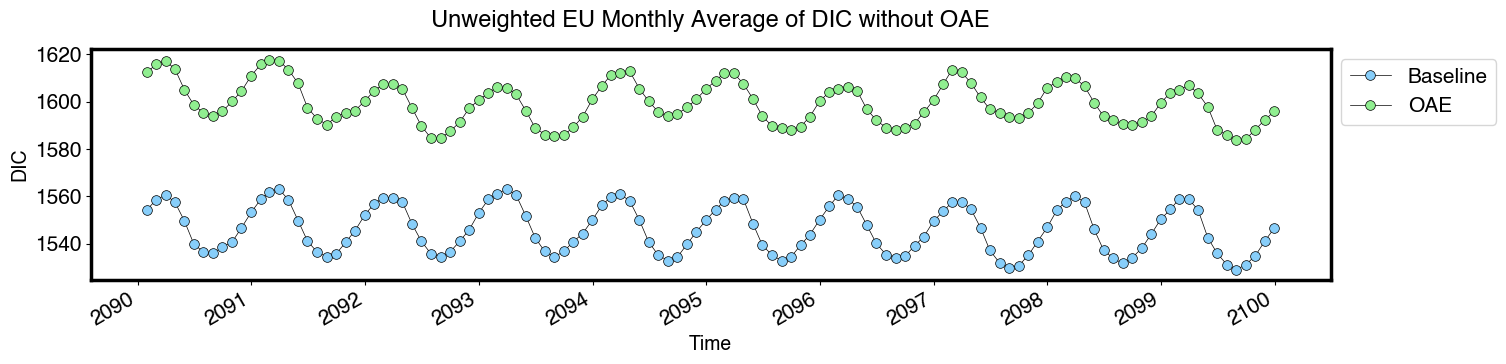

In [79]:
f, ax = plt.subplots(figsize=(16, 3))

dic_monthly_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

dic_monthly_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Monthly Average of DIC without OAE", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [80]:
dic_baseline_monthly = dic_monthly_mean_baseline.to_dataframe('DIC_Flux')
dic_baseline_monthly = dic_baseline_monthly.droplevel(1, axis=0)
dic_baseline_monthly['Month'] = pd.DatetimeIndex(dic_baseline_monthly.index).month

In [81]:
conditions = [
    (dic_baseline_monthly['Month'] == 1),
    (dic_baseline_monthly['Month'] == 2),
    (dic_baseline_monthly['Month'] == 3),
    (dic_baseline_monthly['Month'] == 4),
    (dic_baseline_monthly['Month'] == 5),
    (dic_baseline_monthly['Month'] == 6),
    (dic_baseline_monthly['Month'] == 7),
    (dic_baseline_monthly['Month'] == 8),
    (dic_baseline_monthly['Month'] == 9),
    (dic_baseline_monthly['Month'] == 10),
    (dic_baseline_monthly['Month'] == 11),
    (dic_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

dic_baseline_monthly['Month'] = np.select(conditions, values)

In [102]:
colors = dict(zip(dic_baseline_monthly.Month.unique(), ['darkcyan', 'powderblue', 'yellowgreen', 'darkseagreen', 
                                                        'darkgreen', 'bisque', 'gold', 'khaki', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

Text(0.5, 1.06, 'EU Monthly Average of DIC without OAE')

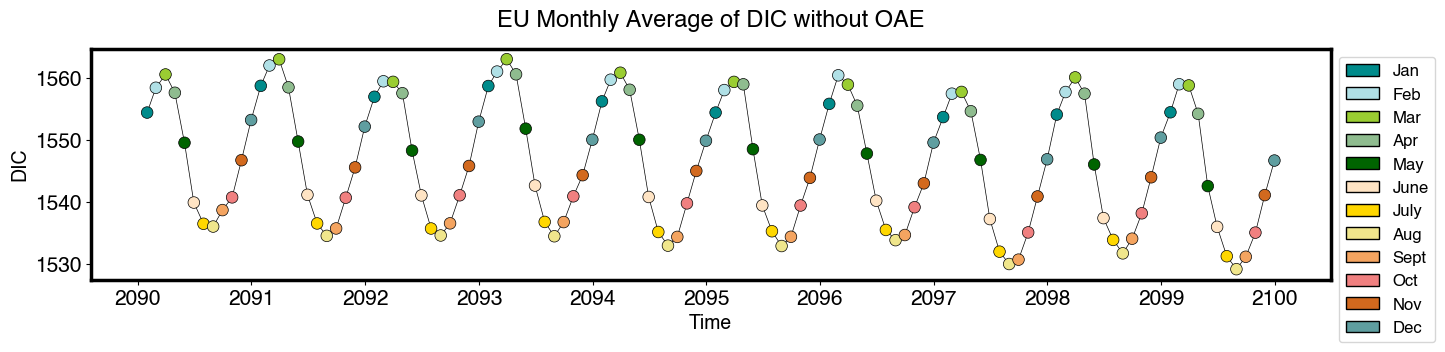

In [103]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot_date(dic_baseline_monthly.index, dic_baseline_monthly.DIC_Flux, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_baseline_monthly.index, dic_baseline_monthly.DIC_Flux, color=dic_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC', fontsize=14)
ax.set_title("EU Monthly Average of DIC without OAE", fontname="Helvetica", fontsize=17, y=1.06)

# 